# Import & Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Aesthetic settings
sns.set(style="whitegrid", palette="muted")
%matplotlib inline

df = pd.read_csv("cleaned_loan_data.csv")
print("Data loaded. Shape:", df.shape)
df.head()


Data loaded. Shape: (10000, 12)


,id,age,cartype,loanamount,deposit,area,apr,applicationoutcome,funded,age_bucket,depositratio,apr_pct
0,9997,61,Convertible,24108.0,881.0,rural,0.15,1,0,55+,0.036544,15%
1,9996,42,Saloon,5988.0,967.0,rural,0.20,1,0,35-44,0.161490,20%
2,9995,57,Saloon,5099.0,973.0,urban,0.15,1,0,55+,0.190822,15%
3,9994,32,Convertible,20774.0,1478.0,rural,0.00,0,0,25-34,0.071147,0%
4,9993,29,Saloon,4612.0,774.0,urban,0.00,0,0,25-34,0.167823,0%


# Age Distribution

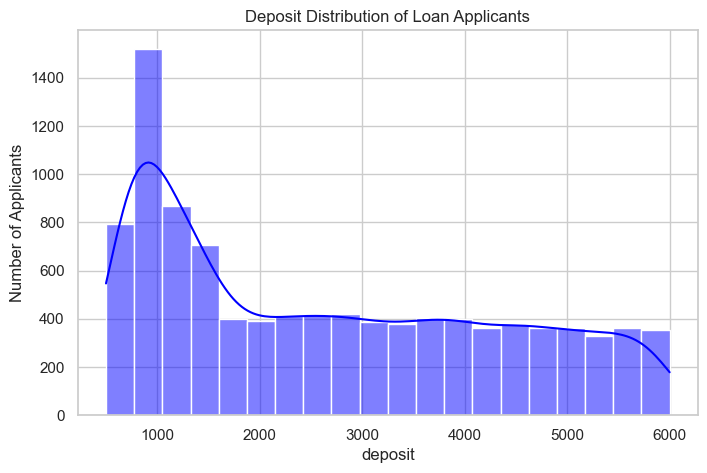

In [2]:
"""
Deposit Distribution:
- Shows how applicants are distributed by deposit.
- Helps identify the primary target demographic (younger vs older borrowers).
"""

plt.figure(figsize=(8,5))
sns.histplot(df["deposit"], bins=20, kde=True, color="blue")
plt.title("Deposit Distribution of Loan Applicants")
plt.xlabel("deposit")
plt.ylabel("Number of Applicants")
plt.show()


# Loan Amount Distribution

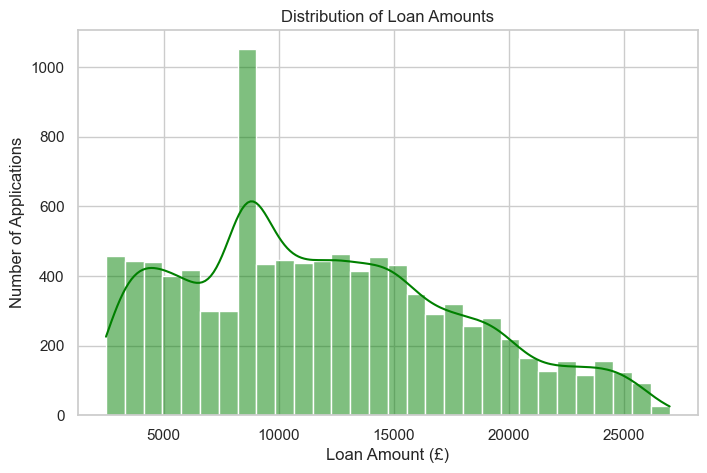

In [3]:
"""
Loan Amount Distribution:
- Visualize the distribution of requested loan amounts.
- Helps marketing identify popular loan sizes to target in campaigns.
"""

plt.figure(figsize=(8,5))
sns.histplot(df["loanamount"], bins=30, kde=True, color="green")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount (£)")
plt.ylabel("Number of Applications")
plt.show()


# Deposit Ratio Distribution

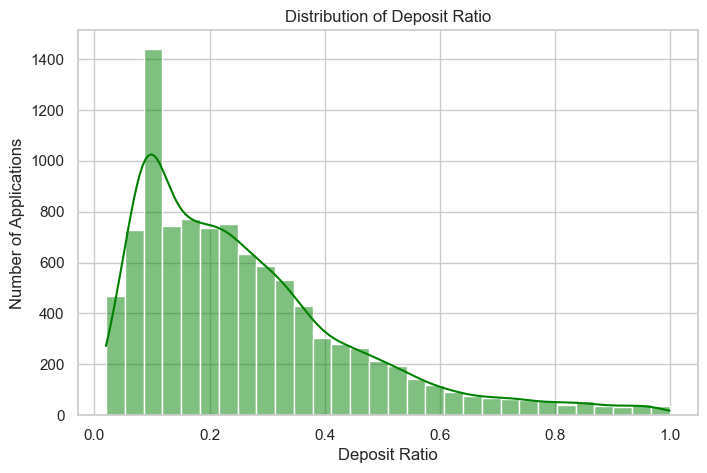

In [4]:
"""
Deposit Ratio Distribution:
- Visualize the distribution of requested Deposit Ratio.
- Helps marketing identify popular Deposit Ratio to target in campaigns.
"""

plt.figure(figsize=(8,5))
sns.histplot(df["depositratio"], bins=30, kde=True, color="green")
plt.title("Distribution of Deposit Ratio")
plt.xlabel("Deposit Ratio")
plt.ylabel("Number of Applications")
plt.show()


# Correlation Analysis


Correlation matrix:


,id,age,loanamount,deposit,apr,applicationoutcome,funded,depositratio
id,1.000000,0.086345,0.044250,0.075411,0.071509,0.094056,0.047355,0.054177
age,0.086345,1.000000,0.065720,0.090802,0.376207,0.464462,0.233680,0.064247
loanamount,0.044250,0.065720,1.000000,0.270473,-0.055679,0.060462,0.042609,-0.445385
deposit,0.075411,0.090802,0.270473,1.000000,0.048088,0.095692,0.105514,0.611610
apr,0.071509,0.376207,-0.055679,0.048088,1.000000,0.809653,0.403516,0.097857
applicationoutcome,0.094056,0.464462,0.060462,0.095692,0.809653,1.000000,0.491514,0.077166
funded,0.047355,0.233680,0.042609,0.105514,0.403516,0.491514,1.000000,0.077381
depositratio,0.054177,0.064247,-0.445385,0.611610,0.097857,0.077166,0.077381,1.000000


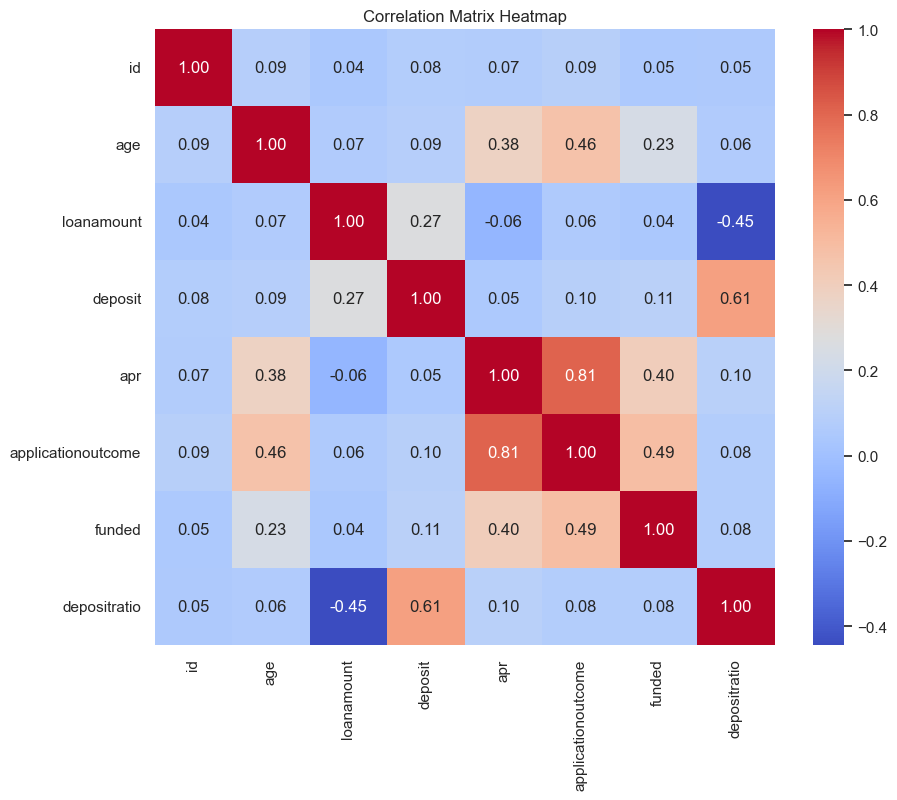

In [5]:
# Compute and visualize the correlation matrix to identify relationships between numerical features.
corr_matrix = df.corr(numeric_only=True)
print("Correlation matrix:")
display(corr_matrix)

# Visualize correlation matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation vs Target

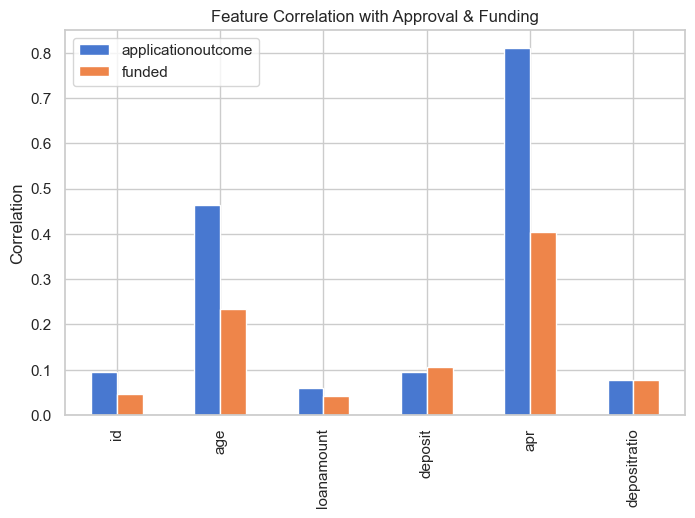

In [6]:
"""
Correlation with Targets:
- Bar plots showing how features correlate with:
  1. Application Outcome (approval)
  2. Funded (conversion)
"""

target_corr = corr_matrix[["applicationoutcome", "funded"]].drop(["applicationoutcome", "funded"])

target_corr.plot(kind="bar", figsize=(8,5))
plt.title("Feature Correlation with Approval & Funding")
plt.ylabel("Correlation")
plt.show()


# Approval Funnel

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8204\3537607676.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(funnel.keys()), y=list(funnel.values()), palette="Blues_d")


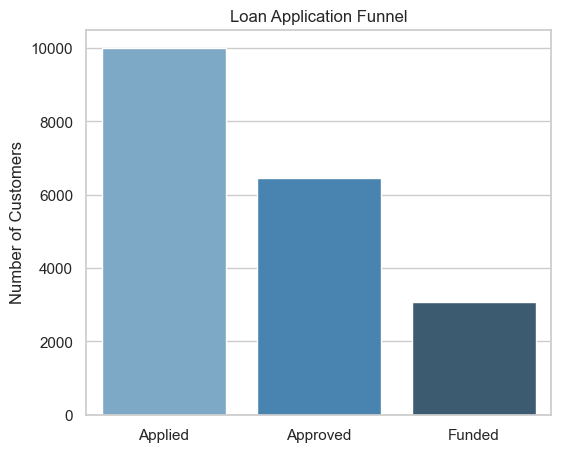

{'Applied': 10000, 'Approved': 6470, 'Funded': 3069}

In [7]:
"""
Approval Funnel:
- Compare application outcomes and conversion (funded loans).
- Helps visualize where drop-offs occur in the customer funnel.
"""

funnel = {
    "Applied": df.shape[0],
    "Approved": df[df["applicationoutcome"] == 1].shape[0],
    "Funded": df[df["funded"] == 1].shape[0]
}

plt.figure(figsize=(6,5))
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()), palette="Blues_d")
plt.title("Loan Application Funnel")
plt.ylabel("Number of Customers")
plt.show()

funnel


# Approval Rate by Car Type

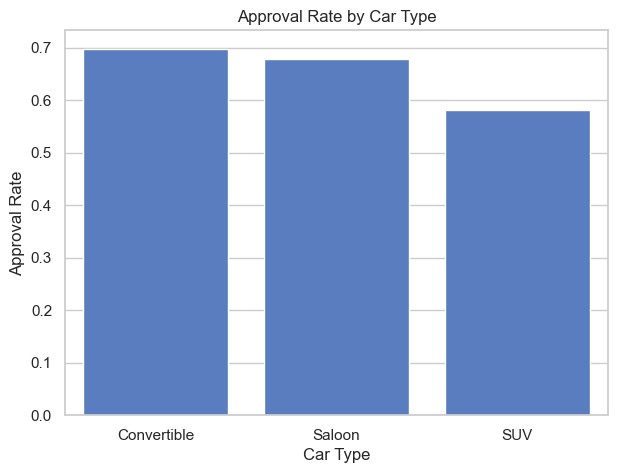

In [8]:
"""
Approval Rate by Car Type:
- Shows how approval rates differ across car categories.
- Helps marketing focus on car types more likely to convert.
"""

plt.figure(figsize=(7,5))
sns.barplot(x="cartype", y="applicationoutcome", data=df, errorbar=None,)
plt.title("Approval Rate by Car Type")
plt.ylabel("Approval Rate")
plt.xlabel("Car Type")
plt.show()


# Approval Rate by Area

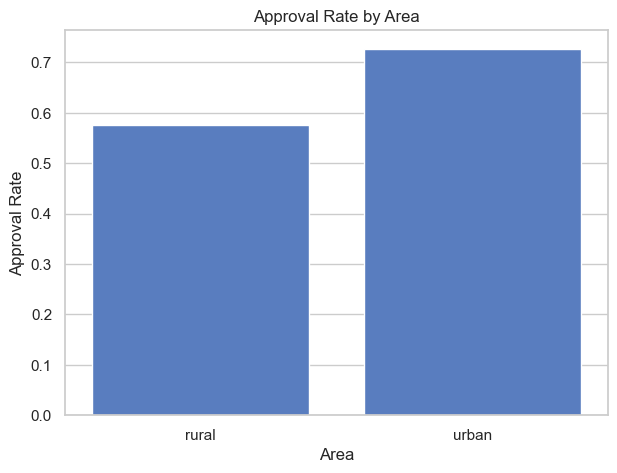

In [9]:
"""
Approval Rate by Area:
- Shows how approval rates differ across Area.
- Helps marketing focus on Area more likely to convert.
"""

plt.figure(figsize=(7,5))
sns.barplot(x="area", y="applicationoutcome", data=df, errorbar=None,)
plt.title("Approval Rate by Area")
plt.ylabel("Approval Rate")
plt.xlabel("Area")
plt.show()


# Approval Rate by Age

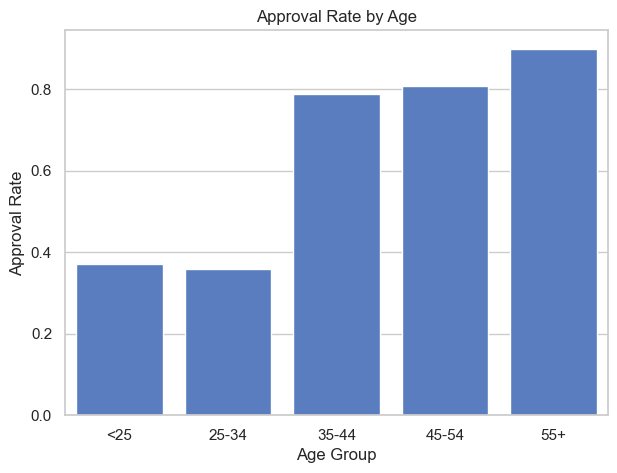

In [10]:
"""
Approval Rate by Age:
- Shows how approval rates differ across Age.
- Helps marketing focus on Age more likely to convert.
"""

age_order = ["<25", "25-34", "35-44", "45-54", "55+"]

plt.figure(figsize=(7,5))
sns.barplot(
    x="age_bucket", 
    y="applicationoutcome", 
    data=df, 
    errorbar=None, 
    order=age_order
)
plt.title("Approval Rate by Age")
plt.ylabel("Approval Rate")
plt.xlabel("Age Group")
plt.show()

# Funding Rate by Area

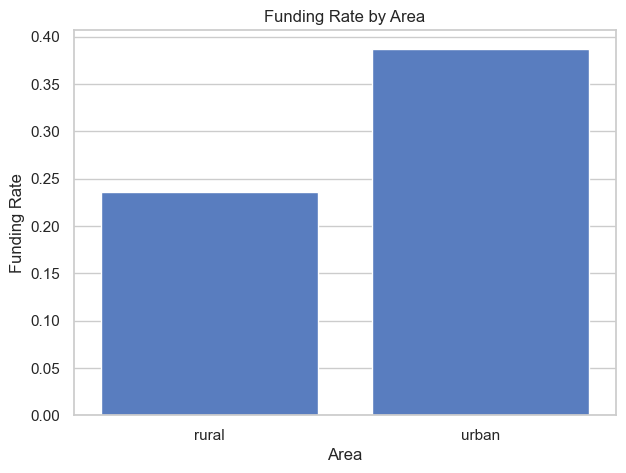

In [11]:
"""
Funding Rate by Area:
- Compare conversion rates (funded loans) for rural vs urban applicants.
- Helps marketing understand which geographic segments respond better.
"""

plt.figure(figsize=(7,5))
sns.barplot(x="area", y="funded", data=df, errorbar=None,)
plt.title("Funding Rate by Area")
plt.ylabel("Funding Rate")
plt.xlabel("Area")
plt.show()


# Funding Rate by Age

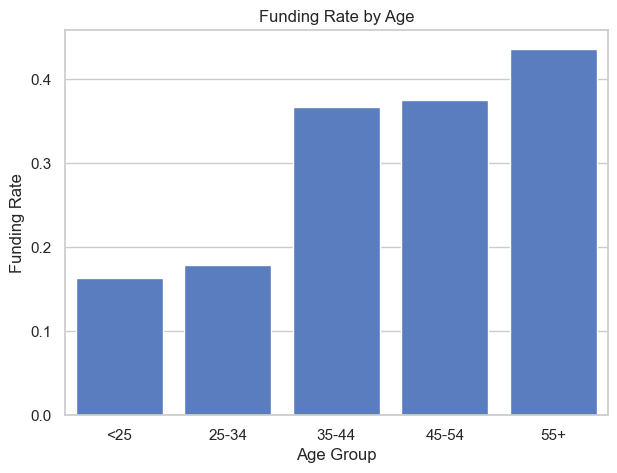

In [12]:
"""
Funding Rate by Age:
- Compare conversion rates (funded loans) for age.
- Helps marketing understand which geographic segments respond better.
"""

age_order = ["<25", "25-34", "35-44", "45-54", "55+"]

plt.figure(figsize=(7,5))
sns.barplot(
    x="age_bucket", 
    y="funded", 
    data=df, 
    errorbar=None,
    order=age_order
)
plt.title("Funding Rate by Age")
plt.ylabel("Funding Rate")
plt.xlabel("Age Group")
plt.show()

# Funding Rate by Car Type

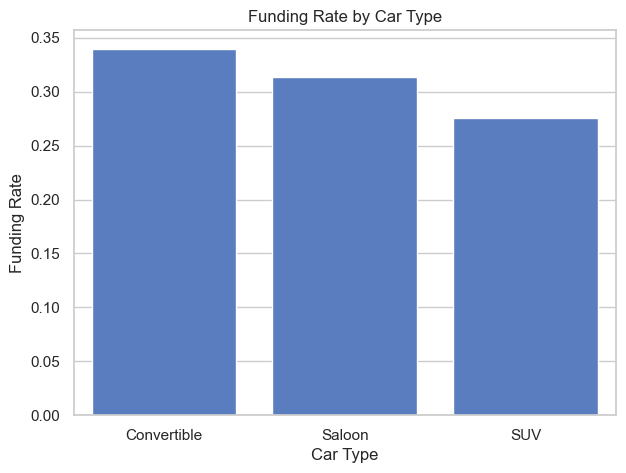

In [13]:
"""
Funding Rate by Car Type:
- Compare conversion rates (funded loans) for car type.
- Helps marketing understand which geographic segments respond better.
"""

plt.figure(figsize=(7,5))
sns.barplot(
    x="cartype", 
    y="funded", 
    data=df, 
    errorbar=None,
)
plt.title("Funding Rate by Car Type")
plt.ylabel("Funding Rate")
plt.xlabel("Car Type")
plt.show()

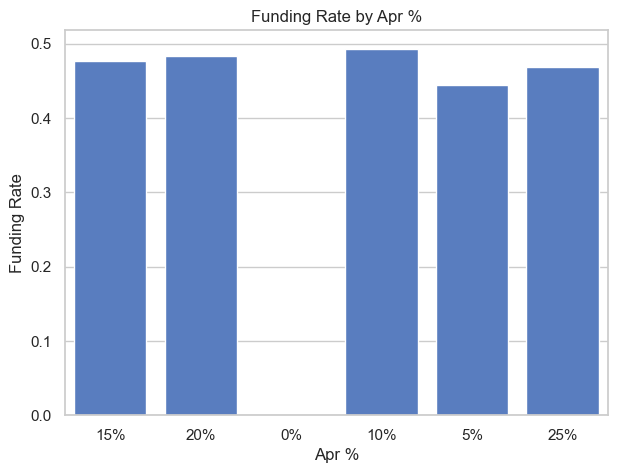

In [14]:
"""
Funding Rate by Apr:
- Compare conversion rates (funded loans) for apr.
- Helps marketing understand which apr pct respond better.
"""

plt.figure(figsize=(7,5))
sns.barplot(
    x="apr_pct", 
    y="funded", 
    data=df, 
    errorbar=None,
)
plt.title("Funding Rate by Apr %")
plt.ylabel("Funding Rate")
plt.xlabel("Apr %")
plt.show()